# Comparative study of different metaheurstics optimization algorithms using IEEE CEC-2017 test functions
***

Topic : Global and non differentiable optimization algorithms : implementation of algorithms and comparative analysis of performance on benchmark set.\
Supervisor : Sylvain Benitto (ExactCure)\
Student : Adly Zaroui\
Due date : February, 2023

In [ ]:
#  ----------------------------------------------------------------------------+

#   Adly Zaroui
#   A python3 notebook for metaheuristics benchmarkig using standard test functions
#   December, 2022

#  ----------------------------------------------------------------------------+

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import *
from metaheuristics import *
from tqdm import tqdm
import pandas as pd
#%matplotlib qt
%matplotlib inline

In [2]:
def plot_optimizerXfunction(optimizers, cost_functions, log=False, maxsteps=100):
    '''Plot the fitness over iterations of optmizer against cos_functions
       1 plot per optimizer'''
    n_functions, n_optimizers = len(cost_functions), len(optimizers)
    for i_model,model in enumerate(optimizers):
        plt.subplot(1,n_optimizers,i_model+1)
        for i_function,function in enumerate(tqdm(cost_functions)):
            opt = model(function, maxsteps=maxsteps)
            opt.optimize(show_progress=False)
            if log == True:
                plt.plot(range(opt.maxsteps), np.maximum(np.log(opt.costs),1e-8*np.ones(maxsteps)), label = function.name)
            else:
                plt.plot(range(opt.maxsteps), opt.costs, label = function.name)
            plt.title(model.name)
        plt.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [3]:
def plot_functionXoptimizer(optimizers, cost_functions, log=False, maxsteps=100):
    '''Plot the fitness over iterations of optmizer against cost_functions
       1 plot per function'''
    n_functions, n_optimizers = len(cost_functions), len(optimizers)
    for i_function,function in enumerate(cost_functions):
        plt.subplot(1,n_functions,i_function+1)
        for i_model,model in enumerate(tqdm(optimizers)):
            opt = model(function, maxsteps=maxsteps)
            opt.optimize(show_progress=False)
            if log == True:
                plt.plot(range(opt.maxsteps), np.maximum(np.log(opt.costs),1e-8*np.ones(maxsteps)), label = opt.name)
            else:
                plt.plot(range(opt.maxsteps), opt.costs, label = opt.name)
            plt.title(function.name)
        plt.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [4]:
from matplotlib import cm
cmap = [(0, '#2f9599'), (0.45, '#eeeeee'), (1, '#8800ff')]
cmap = cm.colors.LinearSegmentedColormap.from_list('Custom', cmap, N=256)

def plot_3d(function, n_space=1000, cmap=cmap, XYZ=None, ax=None, show=True):
    '''Plot 3D '''
    X_domain, Y_domain = function.input_domain
    if XYZ is None:
        X, Y = np.linspace(*X_domain, n_space), np.linspace(*Y_domain, n_space)
        X, Y = np.meshgrid(X, Y)
        XY = np.array([X, Y])
        Z = np.apply_along_axis(function, 0, XY)
    else:
        X, Y, Z = XYZ


    # create new ax if None
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1, projection='3d')

    # Plot the surface.
    ax.plot_surface(X, Y, Z, cmap=cmap,
                           linewidth=0, antialiased=True, alpha=0.7)
    ax.contour(X, Y, Z, zdir='z', levels=30, offset=np.min(Z), cmap=cmap)

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.zaxis.set_tick_params(labelsize=8)
    plt.title(function.name)
    if show:
        plt.show()

In [5]:
def evaluate_optimizerXfunction(optimizers, cost_functions, maxsteps=100):
    '''evaluate each optimizer against each function
       Output : np.array and pd dataframe
       rows are functions, columns are optimizers'''
    n_functions, n_optimizers = len(cost_functions), len(optimizers)
    table_min = np.zeros((n_functions, n_optimizers), dtype=tuple)
    table_max = np.zeros((n_functions, n_optimizers), dtype=tuple)
    table_sd = np.zeros((n_functions, n_optimizers), dtype=tuple)
    table_t = np.zeros((n_functions, n_optimizers), dtype=tuple)
    for i_model,model in enumerate(tqdm(optimizers)):
        for i_function,function in enumerate(cost_functions):
            opt = model(function, maxsteps=maxsteps)
            ev = opt.evaluate(show_progress=True)
            table_min[i_function,i_model] = "{:.3e}".format(ev[0])
            table_max[i_function,i_model] = "{:.3e}".format(ev[1])
            table_sd[i_function,i_model] = "{:.3e}".format(ev[2])
            table_t[i_function,i_model] = "{:.3e}".format(ev[3])
            
    index = [function.name for function in cost_functions]
    columns = [model.name for model in optimizers]
    df_min = pd.DataFrame(table_min, columns=columns, index=index)
    df_max = pd.DataFrame(table_max, columns=columns, index=index)
    df_sd = pd.DataFrame(table_sd, columns=columns, index=index)
    df_t = pd.DataFrame(table_t, columns=columns, index=index)

    return df_min, df_max, df_sd, df_t

# Functions plot

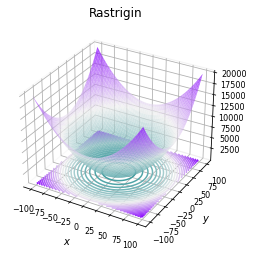

In [17]:
plot_3d(Rastrigin(2), n_space=100)

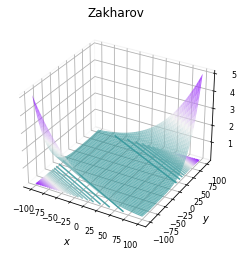

In [18]:
plot_3d(Zakharov(2), n_space=100)

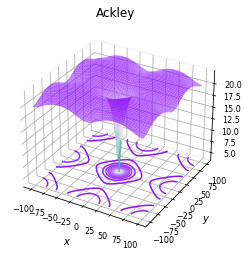

In [19]:
plot_3d(Ackley(2), n_space=100)

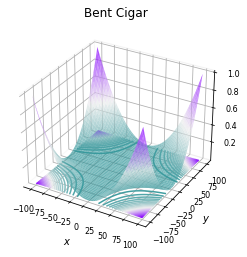

In [20]:
plot_3d(Bent_Cigar(2), n_space=100)

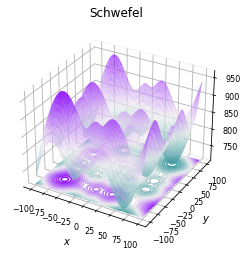

In [21]:
plot_3d(Schwefel(2), n_space=100)

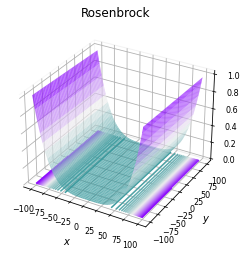

In [22]:
plot_3d(Rosenbrock(2), n_space=100)

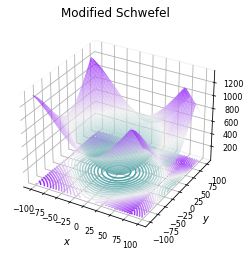

In [23]:
plot_3d(Modified_Schwefel(2), n_space=100)

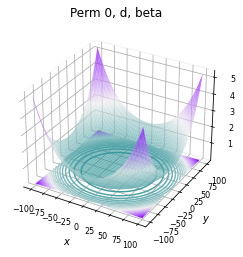

In [24]:
plot_3d(PermZeroDBeta(2), n_space=100)

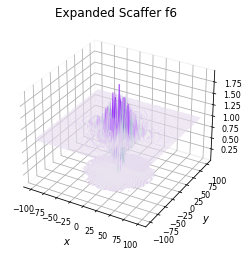

In [25]:
plot_3d(Expanded_Schaffer_f6(2), n_space=100)

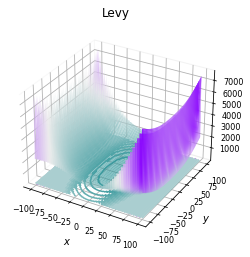

In [26]:
plot_3d(Levy(2), n_space=100)

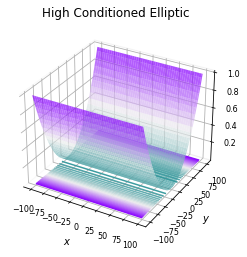

In [27]:
plot_3d(High_Conditioned_Elliptic(2), n_space=100)

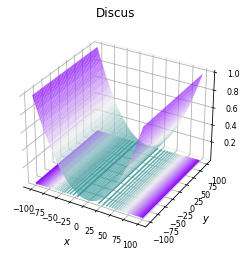

In [28]:
plot_3d(Discus(2), n_space=100)

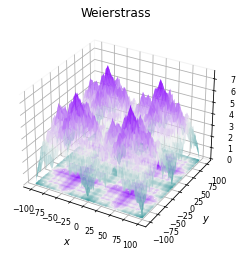

In [29]:
plot_3d(Weierstrass(2), n_space=100)

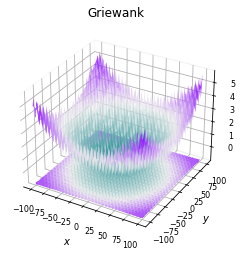

In [30]:
plot_3d(Griewank(2), n_space=100)

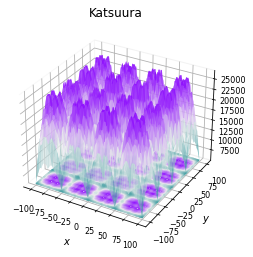

In [31]:
plot_3d(Katsuura(2), n_space=100)

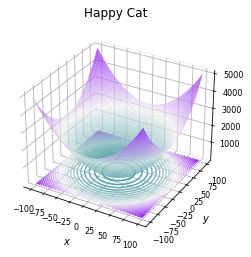

In [32]:
plot_3d(Happy_Cat(2), n_space=100)

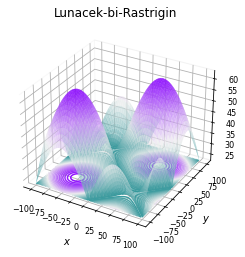

In [33]:
plot_3d(Lunacek_bi_Rastrigin(2), n_space=100)

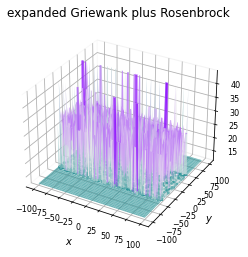

In [34]:
plot_3d(expanded_griewank_plus_rosenbrock(2), n_space=100)

***
# Optimizers over functions

## Simulated annealing

100%|█████████████████████████████████████████████| 7/7 [00:00<00:00,  8.97it/s]


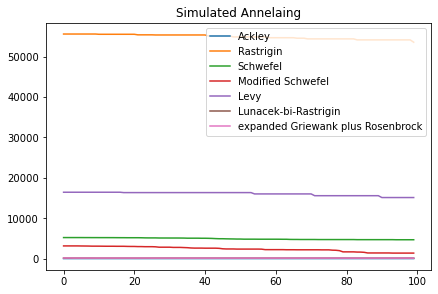

In [62]:
optimizers = [simulated_annealing]
cost_functions = [Ackley(12), Rastrigin(12), Schwefel(12), Modified_Schwefel(12), Levy(12), Lunacek_bi_Rastrigin(12), expanded_griewank_plus_rosenbrock(12)]

plot_optimizerXfunction(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot6.png')

## Differential Evolution

100%|█████████████████████████████████████████████| 7/7 [00:07<00:00,  1.03s/it]


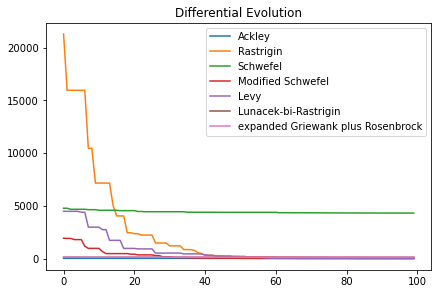

In [7]:
optimizers = [differential_evolution]
cost_functions = [Ackley(12), Rastrigin(12), Schwefel(12), Modified_Schwefel(12), Levy(12), Lunacek_bi_Rastrigin(12), expanded_griewank_plus_rosenbrock(12)]

plot_optimizerXfunction(optimizers, cost_functions, maxsteps=100)

## Whale Optimization

100%|█████████████████████████████████████████████| 7/7 [00:36<00:00,  5.26s/it]


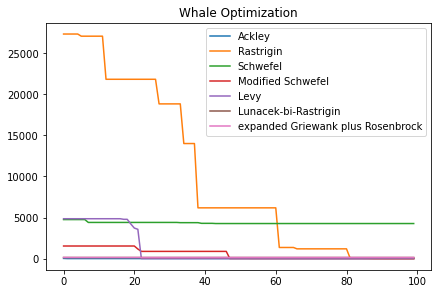

In [8]:
optimizers = [whale_optimization]
cost_functions = [Ackley(12), Rastrigin(12), Schwefel(12), Modified_Schwefel(12), Levy(12), Lunacek_bi_Rastrigin(12), expanded_griewank_plus_rosenbrock(12)]

plot_optimizerXfunction(optimizers, cost_functions)

100%|█████████████████████████████████████████████| 3/3 [00:03<00:00,  1.31s/it]


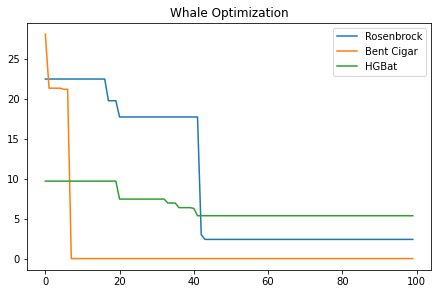

In [9]:
cost_functions = [Rosenbrock(12), Bent_Cigar(12), HGBat(12)]
plot_optimizerXfunction(optimizers, cost_functions, log=True)

## Equilibrium Optimizer

100%|█████████████████████████████████████████████| 7/7 [00:22<00:00,  3.25s/it]


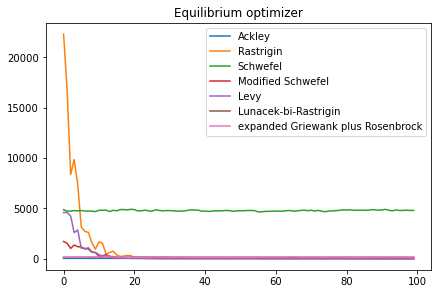

In [48]:
optimizers = [equilibrium_optimizer]
cost_functions = [Ackley(12), Rastrigin(12), Schwefel(12), Modified_Schwefel(12), Levy(12), Lunacek_bi_Rastrigin(12), expanded_griewank_plus_rosenbrock(12)]

plot_optimizerXfunction(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot1.png')

100%|█████████████████████████████████████████████| 5/5 [00:11<00:00,  2.34s/it]


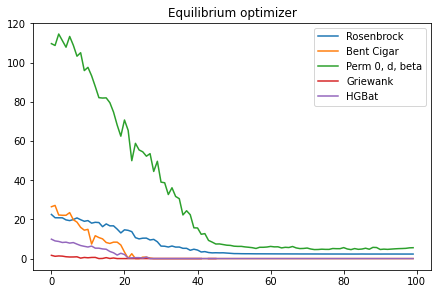

In [11]:
cost_functions = [Rosenbrock(12), Bent_Cigar(12), PermZeroDBeta(12), Griewank(12), HGBat(12)]
plot_optimizerXfunction(optimizers, cost_functions, log=True)

## Grey Wolf Optimizer

100%|█████████████████████████████████████████████| 7/7 [00:03<00:00,  1.95it/s]


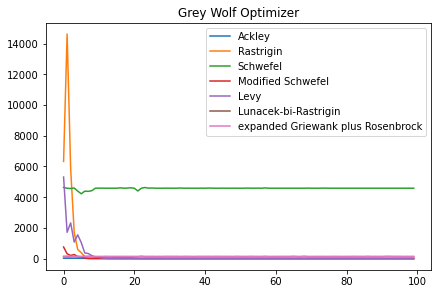

In [12]:
optimizers = [grey_wolf_optimizer]
cost_functions = [Ackley(12), Rastrigin(12), Schwefel(12), Modified_Schwefel(12), Levy(12), Lunacek_bi_Rastrigin(12), expanded_griewank_plus_rosenbrock(12)]

plot_optimizerXfunction(optimizers, cost_functions)

100%|█████████████████████████████████████████████| 6/6 [00:07<00:00,  1.21s/it]


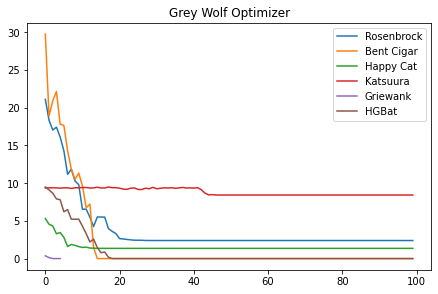

In [13]:
cost_functions = [Rosenbrock(12), Bent_Cigar(12), Happy_Cat(12), Katsuura(12), Griewank(12), HGBat(12)]
plot_optimizerXfunction(optimizers, cost_functions, log=True)

***
# Functions over optimizer

## Rastrigin

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.74it/s]


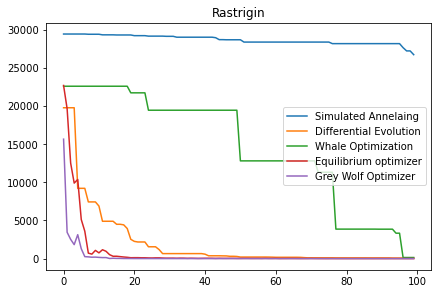

In [49]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Rastrigin(12)]

plot_functionXoptimizer(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot2.png')

## Ackley

100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.16s/it]


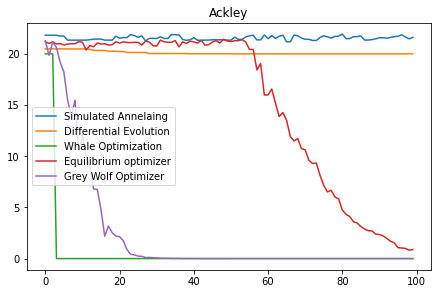

In [50]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Ackley(12)]

plot_functionXoptimizer(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot3.png')

## Rosenbrock

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.34it/s]


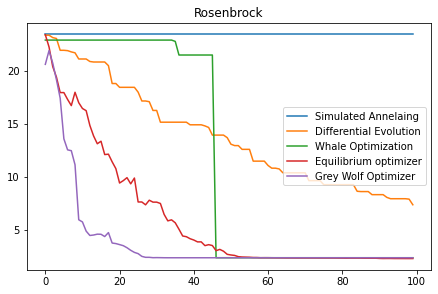

In [51]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Rosenbrock(12)]

plot_functionXoptimizer(optimizers, cost_functions, log=True)

## Zakharov

In [ ]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Zakharov(12)]

plot_functionXoptimizer(optimizers, cost_functions, log=True)

## Bent Cigar

In [ ]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Bent_Cigar(12)]

plot_functionXoptimizer(optimizers, cost_functions, log=True)

## Schwefel

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  1.73it/s]


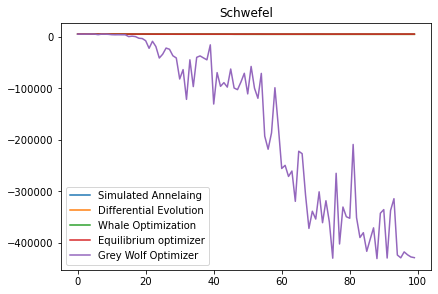

In [52]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Schwefel(12)]

plot_functionXoptimizer(optimizers, cost_functions)

## Modified Schwefel

100%|█████████████████████████████████████████████| 5/5 [00:10<00:00,  2.18s/it]


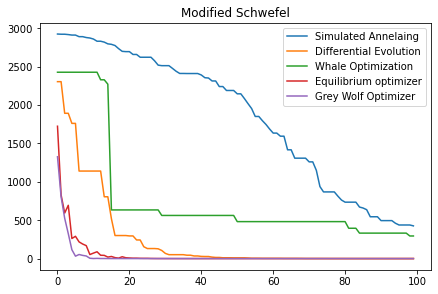

In [54]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Modified_Schwefel(12)]

plot_functionXoptimizer(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot4.png')

##  $Perm \space 0, d, \beta$

100%|█████████████████████████████████████████████| 5/5 [00:20<00:00,  4.05s/it]


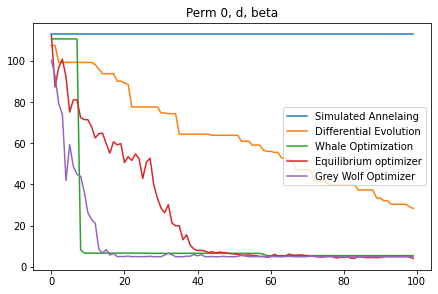

In [16]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [PermZeroDBeta(12)]

plot_functionXoptimizer(optimizers, cost_functions,log=True)

## Expanded Schaffer f6

100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.73s/it]


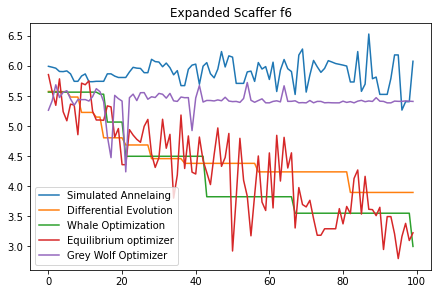

In [55]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Expanded_Schaffer_f6(12)]

plot_functionXoptimizer(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot5.png')

## Levy

100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.03s/it]


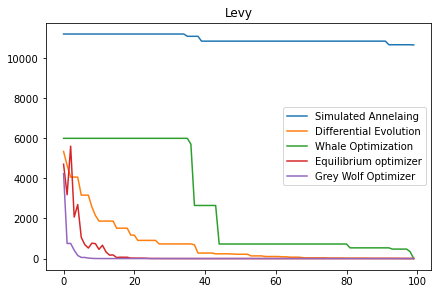

In [36]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Levy(12)]

plot_functionXoptimizer(optimizers, cost_functions)

## High Conditioned Elliptic

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.43it/s]


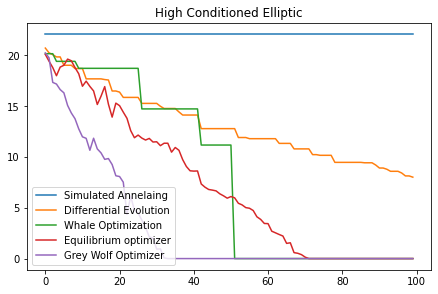

In [37]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [High_Conditioned_Elliptic(12)]

plot_functionXoptimizer(optimizers, cost_functions, log=True)

## Discuss

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.07it/s]


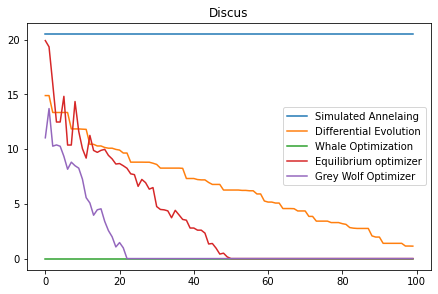

In [38]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Discus(12)]

plot_functionXoptimizer(optimizers, cost_functions, log=True)

## Weierstrass

100%|█████████████████████████████████████████████| 5/5 [00:16<00:00,  3.26s/it]


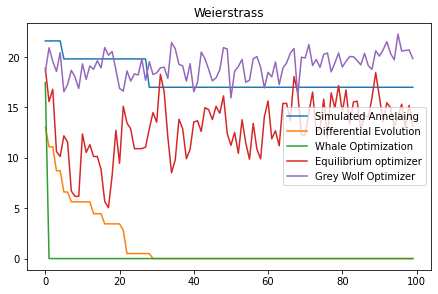

In [39]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Weierstrass(12)]

plot_functionXoptimizer(optimizers, cost_functions)

## Griewank

100%|█████████████████████████████████████████████| 5/5 [00:07<00:00,  1.43s/it]


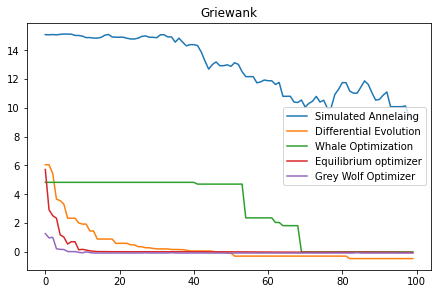

In [40]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Griewank(12)]

plot_functionXoptimizer(optimizers, cost_functions)

## Katsuura

100%|████████████████████████████████████████████| 5/5 [14:27<00:00, 173.55s/it]


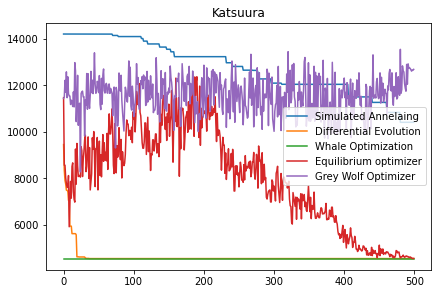

In [41]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Katsuura(12)]

plot_functionXoptimizer(optimizers, cost_functions, maxsteps=500)

## Happy Cat

100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.04s/it]


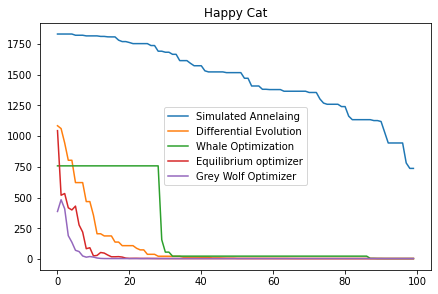

In [57]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Happy_Cat(12)]

plot_functionXoptimizer(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot7.png')

## HGBat

100%|█████████████████████████████████████████████| 5/5 [00:04<00:00,  1.19it/s]


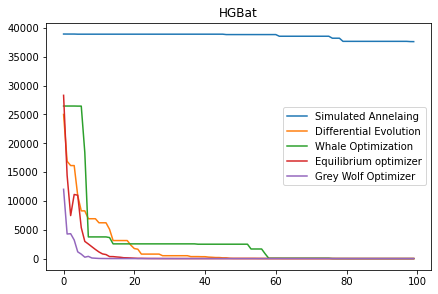

In [58]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [HGBat(12)]

plot_functionXoptimizer(optimizers, cost_functions)

## Lunacek-bi-Rastrigin

100%|█████████████████████████████████████████████| 5/5 [00:05<00:00,  1.09s/it]


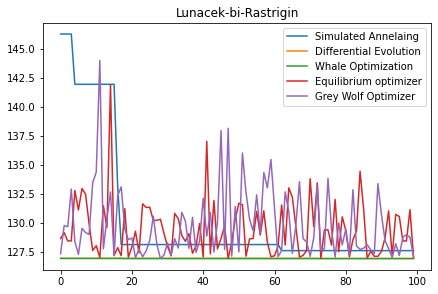

In [60]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [Lunacek_bi_Rastrigin(12)]

plot_functionXoptimizer(optimizers, cost_functions)
plt.savefig('/Users/adly/Desktop/PFE/figures/plot8.png')

## Expanded Griewank plus Rosenbrock

100%|█████████████████████████████████████████████| 5/5 [00:44<00:00,  8.96s/it]


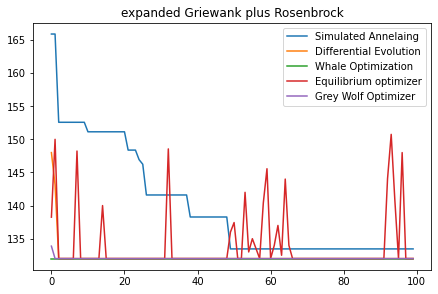

In [61]:
optimizers = [simulated_annealing, differential_evolution, whale_optimization, equilibrium_optimizer, grey_wolf_optimizer]
cost_functions = [expanded_griewank_plus_rosenbrock(12)]

plot_functionXoptimizer(optimizers, cost_functions)

***
# Evaluation

In [6]:
optimizers = [simulated_annealing, differential_evolution,
              whale_optimization, grey_wolf_optimizer, equilibrium_optimizer]

cost_functions = [Rastrigin(12), Rosenbrock(12), Ackley(12), PermZeroDBeta(12), Schwefel(12), 
                  Modified_Schwefel(12), Expanded_Schaffer_f6(12), Levy(12), Bent_Cigar(12),
                  High_Conditioned_Elliptic(12), Discus(12), Weierstrass(12), Griewank(12), Katsuura(12),
                  Happy_Cat(12), HGBat(12), Lunacek_bi_Rastrigin(12), expanded_griewank_plus_rosenbrock(12)]

df_min, df_max, df_sd, df_t = evaluate_optimizerXfunction(optimizers, cost_functions)

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 18.97it/s]

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 12.30it/s]

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 11.71it/s]

100%|███████████████████████████████████████████| 30/30 [00:04<00:00,  7.14it/s]

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 22.11it/s]

 47%|████████████████████                       | 14/30 [00:01<00:01, 12.69it/s]


100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 12.41it/s]

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 14.23it/s]

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 15.64it/s]

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 16.75it/s]

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 19.11it/s]

100%|███████████████████████████████████████████| 30/30 [00:01<00:00, 18.00it/s]

 47%|████████████████████                       | 14/30 [00:01<00:02,  6.99it/s]


100%|███████████████████████████████████████████| 30/30 [00:04<00:00,  6.79it/s]

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 10.37it/s]

100%|███████████████████████████████████████████| 30/30 [00:29<00:00,  1.01it/s]

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 13.82it/s]

100%|███████████████████████████████████████████| 30/30 [00:02<00:00, 12.95it/s]

  0%|                                                    | 0/30 [00:00<?, ?it/s]


100%|███████████████████████████████████████████| 30/30 [00:03<00:00,  9.80it/s]

100%|███████████████████████████████████████████| 30/30 [00:21<00:00,  1.41it/s]

 47%|████████████████████                       | 14/30 [00:09<00:10,  1.50it/s]


100%|███████████████████████████████████████████| 30/30 [00:20<00:00,  1.50it/s]

100%|███████████████████████████████████████████| 30/30 [00:22<00:00,  1.31it/s]

100%|███████████████████████████████████████████| 30/30 [00:46<00:00,  1.55s/it]

 60%|█████████████████████████▊                 | 18/30 [00:11<00:07,  1.66it/s]


100%|███████████████████████████████████████████| 30/30 [00:18<00:00,  1.60it/s]

100%|███████████████████████████████████████████| 30/30 [00:30<00:00,  1.01s/it]

100%|███████████████████████████████████████████| 30/30 [00:24<00:00,  1.23it/s]

 73%|███████████████████████████████▌           | 22/30 [00:16<00:05,  1.34it/s]


100%|███████████████████████████████████████████| 30/30 [00:22<00:00,  1.33it/s]

100%|███████████████████████████████████████████| 30/30 [00:18<00:00,  1.66it/s]

100%|███████████████████████████████████████████| 30/30 [00:19<00:00,  1.57it/s]

 87%|█████████████████████████████████████▎     | 26/30 [00:15<00:02,  1.68it/s]


100%|███████████████████████████████████████████| 30/30 [00:18<00:00,  1.64it/s]

100%|███████████████████████████████████████████| 30/30 [00:43<00:00,  1.45s/it]

100%|███████████████████████████████████████████| 30/30 [00:25<00:00,  1.18it/s]

100%|███████████████████████████████████████████| 30/30 [05:15<00:00, 10.53s/it]



100%|███████████████████████████████████████████| 30/30 [00:20<00:00,  1.46it/s]

100%|███████████████████████████████████████████| 30/30 [00:20<00:00,  1.43it/s]

100%|███████████████████████████████████████████| 30/30 [00:22<00:00,  1.32it/s]

 10%|████▍                                       | 3/30 [00:09<01:22,  3.04s/it]


100%|███████████████████████████████████████████| 30/30 [00:30<00:00,  1.02s/it]

100%|███████████████████████████████████████████| 30/30 [00:35<00:00,  1.17s/it]

 20%|████████▊                                   | 6/30 [00:11<00:48,  2.01s/it]


100%|███████████████████████████████████████████| 30/30 [01:00<00:00,  2.01s/it]

100%|███████████████████████████████████████████| 30/30 [04:58<00:00,  9.96s/it]

100%|███████████████████████████████████████████| 30/30 [00:24<00:00,  1.23it/s]

 33%|██████████████▎                            | 10/30 [00:47<01:35,  4.75s/it]


100%|███████████████████████████████████████████| 30/30 [02:23<00:00,  4.77s/it]

100%|███████████████████████████████████████████| 30/30 [01:17<00:00,  2.59s/it]

100%|███████████████████████████████████████████| 30/30 [00:56<00:00,  1.89s/it]

 47%|████████████████████                       | 14/30 [00:12<00:13,  1.20it/s]


100%|███████████████████████████████████████████| 30/30 [00:25<00:00,  1.17it/s]

100%|███████████████████████████████████████████| 30/30 [00:34<00:00,  1.15s/it]

100%|███████████████████████████████████████████| 30/30 [00:25<00:00,  1.17it/s]

 60%|█████████████████████████▊                 | 18/30 [02:41<01:47,  8.94s/it]


100%|███████████████████████████████████████████| 30/30 [04:29<00:00,  8.97s/it]

100%|███████████████████████████████████████████| 30/30 [01:38<00:00,  3.27s/it]

100%|███████████████████████████████████████████| 30/30 [49:09<00:00, 98.32s/it]

 73%|███████████████████████████████▌           | 22/30 [00:30<00:11,  1.40s/it]


100%|███████████████████████████████████████████| 30/30 [00:41<00:00,  1.38s/it]

100%|███████████████████████████████████████████| 30/30 [00:48<00:00,  1.63s/it]

100%|███████████████████████████████████████████| 30/30 [00:57<00:00,  1.93s/it]

 87%|█████████████████████████████████████▎     | 26/30 [09:47<01:30, 22.63s/it]


100%|███████████████████████████████████████████| 30/30 [00:07<00:00,  4.25it/s]

100%|███████████████████████████████████████████| 30/30 [00:07<00:00,  4.12it/s]

 97%|█████████████████████████████████████████▌ | 29/30 [00:08<00:00,  3.49it/s]


100%|███████████████████████████████████████████| 30/30 [00:08<00:00,  3.50it/s]

100%|███████████████████████████████████████████| 30/30 [00:20<00:00,  1.45it/s]

100%|███████████████████████████████████████████| 30/30 [00:06<00:00,  4.42it/s]

100%|███████████████████████████████████████████| 30/30 [00:13<00:00,  2.29it/s]

  7%|██▉                                         | 2/30 [00:00<00:09,  3.03it/s]


100%|███████████████████████████████████████████| 30/30 [00:09<00:00,  3.16it/s]

100%|███████████████████████████████████████████| 30/30 [00:08<00:00,  3.55it/s]

100%|███████████████████████████████████████████| 30/30 [00:06<00:00,  4.42it/s]

 20%|████████▊                                   | 6/30 [00:01<00:05,  4.10it/s]


100%|███████████████████████████████████████████| 30/30 [00:07<00:00,  4.13it/s]

100%|███████████████████████████████████████████| 30/30 [00:06<00:00,  4.51it/s]

100%|███████████████████████████████████████████| 30/30 [00:19<00:00,  1.53it/s]

 33%|██████████████▎                            | 10/30 [00:03<00:07,  2.65it/s]


100%|███████████████████████████████████████████| 30/30 [00:10<00:00,  2.75it/s]

100%|███████████████████████████████████████████| 30/30 [02:39<00:00,  5.33s/it]

100%|███████████████████████████████████████████| 30/30 [00:07<00:00,  3.92it/s]

 47%|████████████████████                       | 14/30 [00:03<00:04,  3.80it/s]


100%|███████████████████████████████████████████| 30/30 [00:08<00:00,  3.68it/s]

100%|███████████████████████████████████████████| 30/30 [00:08<00:00,  3.38it/s]

 57%|████████████████████████▎                  | 17/30 [00:14<00:10,  1.21it/s]


100%|███████████████████████████████████████████| 30/30 [00:25<00:00,  1.19it/s]

100%|███████████████████████████████████████████| 30/30 [00:27<00:00,  1.10it/s]

100%|███████████████████████████████████████████| 30/30 [00:40<00:00,  1.35s/it]

 70%|██████████████████████████████             | 21/30 [02:26<01:03,  7.09s/it]


100%|███████████████████████████████████████████| 30/30 [03:21<00:00,  6.72s/it]

100%|███████████████████████████████████████████| 30/30 [00:21<00:00,  1.39it/s]

100%|███████████████████████████████████████████| 30/30 [01:27<00:00,  2.91s/it]

 83%|███████████████████████████████████▊       | 25/30 [00:42<00:08,  1.71s/it]


100%|███████████████████████████████████████████| 30/30 [00:50<00:00,  1.70s/it]

100%|███████████████████████████████████████████| 30/30 [00:39<00:00,  1.30s/it]

100%|███████████████████████████████████████████| 30/30 [00:21<00:00,  1.39it/s]

 97%|█████████████████████████████████████████▌ | 29/30 [00:26<00:00,  1.11it/s]


100%|███████████████████████████████████████████| 30/30 [00:26<00:00,  1.11it/s]

100%|███████████████████████████████████████████| 30/30 [00:21<00:00,  1.42it/s]

100%|███████████████████████████████████████████| 30/30 [02:43<00:00,  5.44s/it]

100%|███████████████████████████████████████████| 30/30 [01:00<00:00,  2.03s/it]

  7%|██▉                                         | 2/30 [01:57<27:22, 58.66s/it]


100%|███████████████████████████████████████████| 30/30 [33:07<00:00, 66.25s/it]

100%|███████████████████████████████████████████| 30/30 [00:32<00:00,  1.08s/it]

100%|███████████████████████████████████████████| 30/30 [00:34<00:00,  1.15s/it]

 20%|████████▊                                   | 6/30 [00:08<00:32,  1.35s/it]


100%|███████████████████████████████████████████| 30/30 [00:40<00:00,  1.35s/it]

100%|█████████████████████████████████████████| 5/5 [2:38:09<00:00, 1897.87s/it]


In [7]:
df_min

,Simulated Annelaing,Differential Evolution,Whale Optimization,Grey Wolf Optimizer,Equilibrium optimizer
Rastrigin,2.327e+04,4.917e+01,0.000e+00,0.000e+00,2.079e-04
Rosenbrock,6.180e+09,2.463e+02,1.092e+01,1.090e+01,1.009e+01
Ackley,2.096e+01,2.000e+01,4.441e-16,1.193e-06,2.391e-04
"Perm 0, d, beta",8.822e+47,1.263e+05,5.689e+01,1.280e+02,1.228e+02
Schwefel,4.443e+03,4.289e+03,4.264e+03,-1.503e+06,4.661e+03
Modified Schwefel,4.085e+02,2.177e-02,1.527e-04,1.527e-04,1.527e-04
Expanded Scaffer f6,5.338e+00,3.113e+00,0.000e+00,0.000e+00,1.899e+00
Levy,4.577e+03,1.310e+00,7.796e-01,6.222e-01,5.716e-01
Bent Cigar,1.107e+11,9.339e-18,0.000e+00,3.703e-99,1.423e-39
High Conditioned Elliptic,4.155e+08,4.368e+02,0.000e+00,2.166e-12,2.118e-06


In [8]:
df_max

,Simulated Annelaing,Differential Evolution,Whale Optimization,Grey Wolf Optimizer,Equilibrium optimizer
Rastrigin,6.172e+04,7.981e+01,5.133e+02,2.482e+01,6.310e+01
Rosenbrock,3.736e+10,1.015e+04,1.339e+09,1.099e+01,1.622e+01
Ackley,2.201e+01,2.000e+01,4.441e-16,3.611e-04,2.007e+01
"Perm 0, d, beta",1.671e+51,1.639e+17,1.478e+37,1.174e+03,3.873e+07
Schwefel,4.764e+03,4.339e+03,4.519e+03,4.981e+03,5.208e+03
Modified Schwefel,2.423e+03,7.680e-01,5.422e+02,1.531e-04,1.620e-04
Expanded Scaffer f6,6.303e+00,4.379e+00,5.228e+00,4.744e+00,8.063e+00
Levy,1.888e+04,1.274e+01,5.034e+01,1.508e+00,4.447e+00
Bent Cigar,4.076e+14,2.217e-10,0.000e+00,1.174e-32,6.607e-18
High Conditioned Elliptic,1.315e+10,8.964e+04,1.984e+08,6.969e-05,3.273e-02


In [9]:
df_sd

,Simulated Annelaing,Differential Evolution,Whale Optimization,Grey Wolf Optimizer,Equilibrium optimizer
Rastrigin,1.016e+04,7.252e+00,1.221e+02,4.455e+00,1.764e+01
Rosenbrock,7.636e+09,2.001e+03,2.401e+08,2.210e-02,1.271e+00
Ackley,2.524e-01,7.634e-05,0.000e+00,9.384e-05,5.126e+00
"Perm 0, d, beta",4.344e+50,2.955e+16,2.652e+36,2.661e+02,7.360e+06
Schwefel,8.389e+01,1.493e+01,6.891e+01,4.149e+05,1.187e+02
Modified Schwefel,6.553e+02,1.356e-01,9.938e+01,6.799e-08,1.666e-06
Expanded Scaffer f6,2.260e-01,2.992e-01,1.612e+00,1.492e+00,1.755e+00
Levy,3.874e+03,2.589e+00,1.203e+01,2.611e-01,7.009e-01
Bent Cigar,9.698e+13,3.981e-11,0.000e+00,2.118e-33,1.186e-18
High Conditioned Elliptic,3.390e+09,1.710e+04,3.561e+07,2.112e-05,5.824e-03


In [10]:
df_t

,Simulated Annelaing,Differential Evolution,Whale Optimization,Grey Wolf Optimizer,Equilibrium optimizer
Rastrigin,5.043e-02,7.062e-01,1.021e+00,2.328e-01,8.380e-01
Rosenbrock,7.704e-02,6.649e-01,1.170e+00,2.405e-01,9.077e-01
Ackley,8.230e-02,7.616e-01,2.008e+00,2.832e-01,1.350e+00
"Perm 0, d, beta",1.369e-01,1.548e+00,9.954e+00,6.875e-01,6.720e+00
Schwefel,4.428e-02,6.212e-01,8.118e-01,2.239e-01,7.180e-01
Modified Schwefel,7.903e-02,1.008e+00,4.768e+00,4.337e-01,2.906e+00
Expanded Scaffer f6,6.870e-02,8.076e-01,2.583e+00,3.139e-01,1.693e+00
Levy,6.240e-02,7.518e-01,1.888e+00,2.792e-01,1.303e+00
Bent Cigar,5.779e-02,6.010e-01,8.490e-01,2.235e-01,7.155e-01
High Conditioned Elliptic,5.118e-02,6.343e-01,1.145e+00,2.396e-01,8.960e-01


In [12]:
df_min.to_csv('/Users/adly/Desktop/PFE/results/min.csv', encoding='utf-8')
df_max.to_csv('/Users/adly/Desktop/PFE/results/max.csv', encoding='utf-8')
df_sd.to_csv('/Users/adly/Desktop/PFE/results/sd.csv', encoding='utf-8')
df_t.to_csv('/Users/adly/Desktop/PFE/results/t.csv', encoding='utf-8')

In [63]:
f = Rastrigin(4)
model = equilibrium_optimizer(f)

100%|█████████████████████████████████████████| 100/100 [00:01<00:00, 91.59it/s]


(array([-3.82370066e-06,  2.57611476e-05,  3.18225356e-05,  1.23212601e-05]),
 3.6558595439828423e-07,
 [2468.09067731046,
  2323.5141511826837,
  1207.5951142875836,
  929.2707780635361,
  868.4665238977334,
  601.6729439391349,
  410.6920089472719,
  512.2717348485199,
  252.83843054893015,
  70.56923692657094,
  70.56923692657094,
  72.28424924555227,
  40.144971258678346,
  55.655760213190504,
  69.52081779109088,
  36.632472505471966,
  22.45909186615487,
  37.71033360589088,
  28.034531231263884,
  21.16393504331869,
  20.28441168449509,
  5.614453861300952,
  5.108836504270954,
  4.8693431536542775,
  5.367173310717114,
  7.298241356975872,
  3.2908623079052717,
  5.617097861330933,
  12.538691347647742,
  9.823214053217733,
  9.823214053217733,
  12.086610320635085,
  3.7434159632129393,
  8.540952791566426,
  5.886865738560161,
  5.127904707378029,
  9.973683159876678,
  5.81506733921978,
  8.55317613306562,
  4.412705605530867,
  4.466111358913466,
  4.466111358913466,
  5.30